In [83]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline
colnames = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
data = pd.read_csv('Data/adult.data', sep=", ", names=colnames, header=None, index_col=False)
data.replace("?", float("nan"), inplace=True)
data.dropna(inplace=True)

# create mappings for education
education_mapping = data[['education', 'education_num']].drop_duplicates().sort_values(by='education_num', ascending=True)
print(education_mapping)

C:\Users\Kathy\AppData\Local\Temp\ipykernel_13024\4085719864.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('Data/adult.data', sep=", ", names=colnames, header=None, index_col=False)


        education  education_num
224     Preschool              1
416       1st-4th              2
56        5th-6th              3
15        7th-8th              4
6             9th              5
219          10th              6
3            11th              7
415          12th              8
2         HS-grad              9
10   Some-college             10
48      Assoc-voc             11
13     Assoc-acdm             12
0       Bachelors             13
5         Masters             14
52    Prof-school             15
20      Doctorate             16


In [84]:
# clean data/change data types:
data.workclass = data.workclass.astype('category')
data.education = data.education.astype('category')
data.marital_status = data.marital_status.astype('category')
data.occupation = data.occupation.astype('category')
data.relationship = data.relationship.astype('category')
data.race = data.race.astype('category')
data.sex = data.sex.astype('category')
data.native_country = data.native_country.astype('category')
data.income = data.income.astype('category')


In [85]:
print("Count of income >50k: " + str(len(data[data.income == '>50K'])))
print("Count of income <=50k: " + str(len(data[data.income == '<=50K'])))

Count of income >50k: 7508
Count of income <=50k: 22654


In [86]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [87]:
# visualization for all single variables:

def numerical(col):
    print("For variable " + col)
    print("Min is: " + str(data[col].min()))
    print("Max is: " + str(data[col].max()))
    print("Mean is: " + str(data[col].mean()))
    print("Std Dev is: " + str(data[col].std()))
    
    # countplot of all values based on income
    fig1 = plt.figure(figsize=(20,6))
    ax1 = sns.countplot(x=col, hue='income', data=data)
    plt.title(col)
    
    # kdeplot for all values based on salary
    fig2, ax2 = plt.subplots(figsize=(20, 6))
    sns.kdeplot(data[data.income=="<=50K"][col], label='<=50k', fill=True, ax=ax2)
    sns.kdeplot(data[data.income==">50K"][col], label='>50k', fill=True, ax=ax2)
    ax2.legend()
    plt.title(col)
    plt.tight_layout()
    
    # scatterplot vs income
    fig3, ax3 = plt.subplots(ncols=2, nrows=1, figsize=(20,6))
    ax3[0].boxplot(data[data.income=='>50K'][col])
    ax3[0].set_title(col+" >50K")
    ax3[1].boxplot(data[data.income=='<=50K'][col])
    ax3[1].set_title(col+" <=50K")
    plt.show()
    
    
def categorical(col):
    counts_above = data[data.income=='>50K'][col].value_counts()
    counts_below = data[data.income=='<=50K'][col].value_counts()
    print("For variable " + col)
    print(counts_above)
    print(counts_below)

    # countplot of all values based on income
    fig1 = plt.figure(figsize=(20,6))
    ax1 = sns.countplot(x=col, hue='income', data=data)
    plt.xticks(rotation=90, ha='right', fontsize=11)
    plt.title(col)
    plt.show()
    
    # pie chart of all values
    fig2, ax2 = plt.subplots(ncols=2, nrows=1, figsize=(20,10))
    ax2[0].pie(counts_above, labels = counts_above.index, autopct='%.0f%%')
    ax2[0].set_title(col+" >50K")
    ax2[1].pie(counts_below, labels = counts_below.index, autopct='%.0f%%')
    ax2[1].set_title(col+" <=50K")
    plt.show()
    
    # matrix/heatplot vs income
    fig3, ax3 = plt.subplots(figsize=(30,10))
    mosaic(data, [col, 'income'], ax=ax3, axes_label=False)
    plt.title(col)
    plt.show()
    

For variable marital_status
Married-civ-spouse       6399
Never-married             470
Divorced                  452
Widowed                    80
Separated                  66
Married-spouse-absent      31
Married-AF-spouse          10
Name: marital_status, dtype: int64
Never-married            9256
Married-civ-spouse       7666
Divorced                 3762
Separated                 873
Widowed                   747
Married-spouse-absent     339
Married-AF-spouse          11
Name: marital_status, dtype: int64


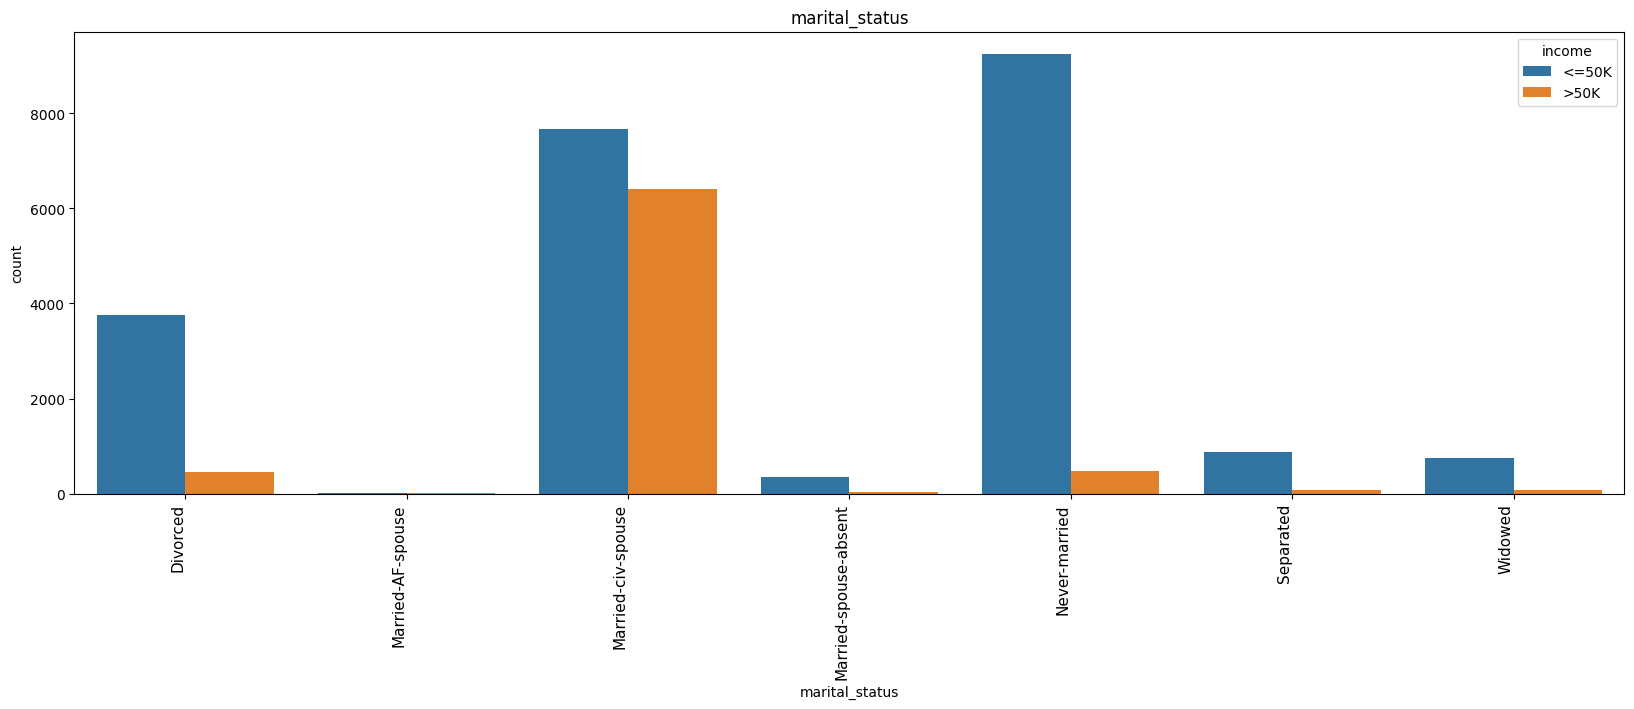

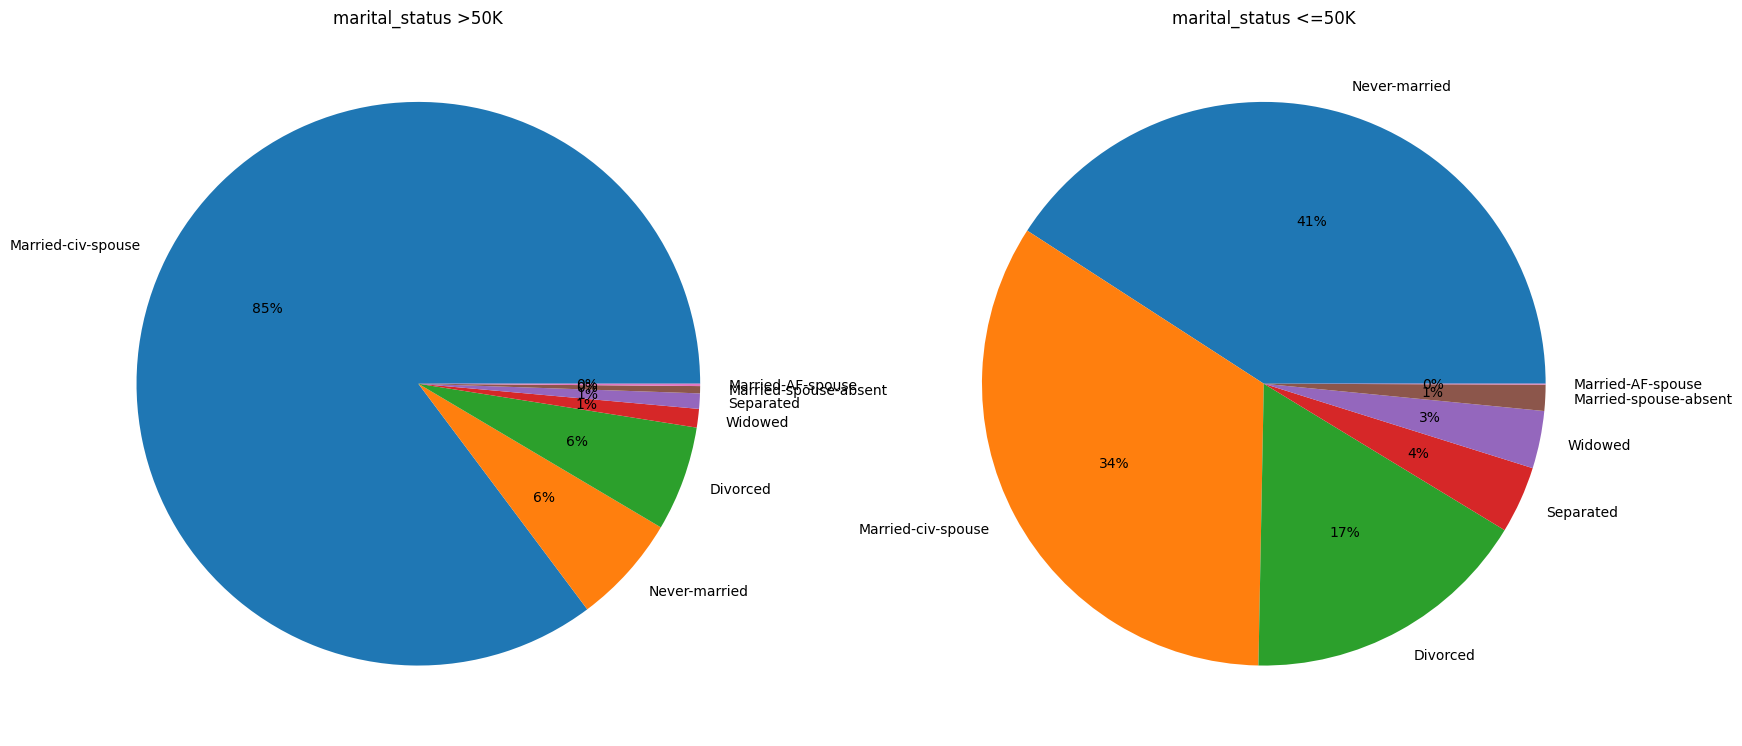

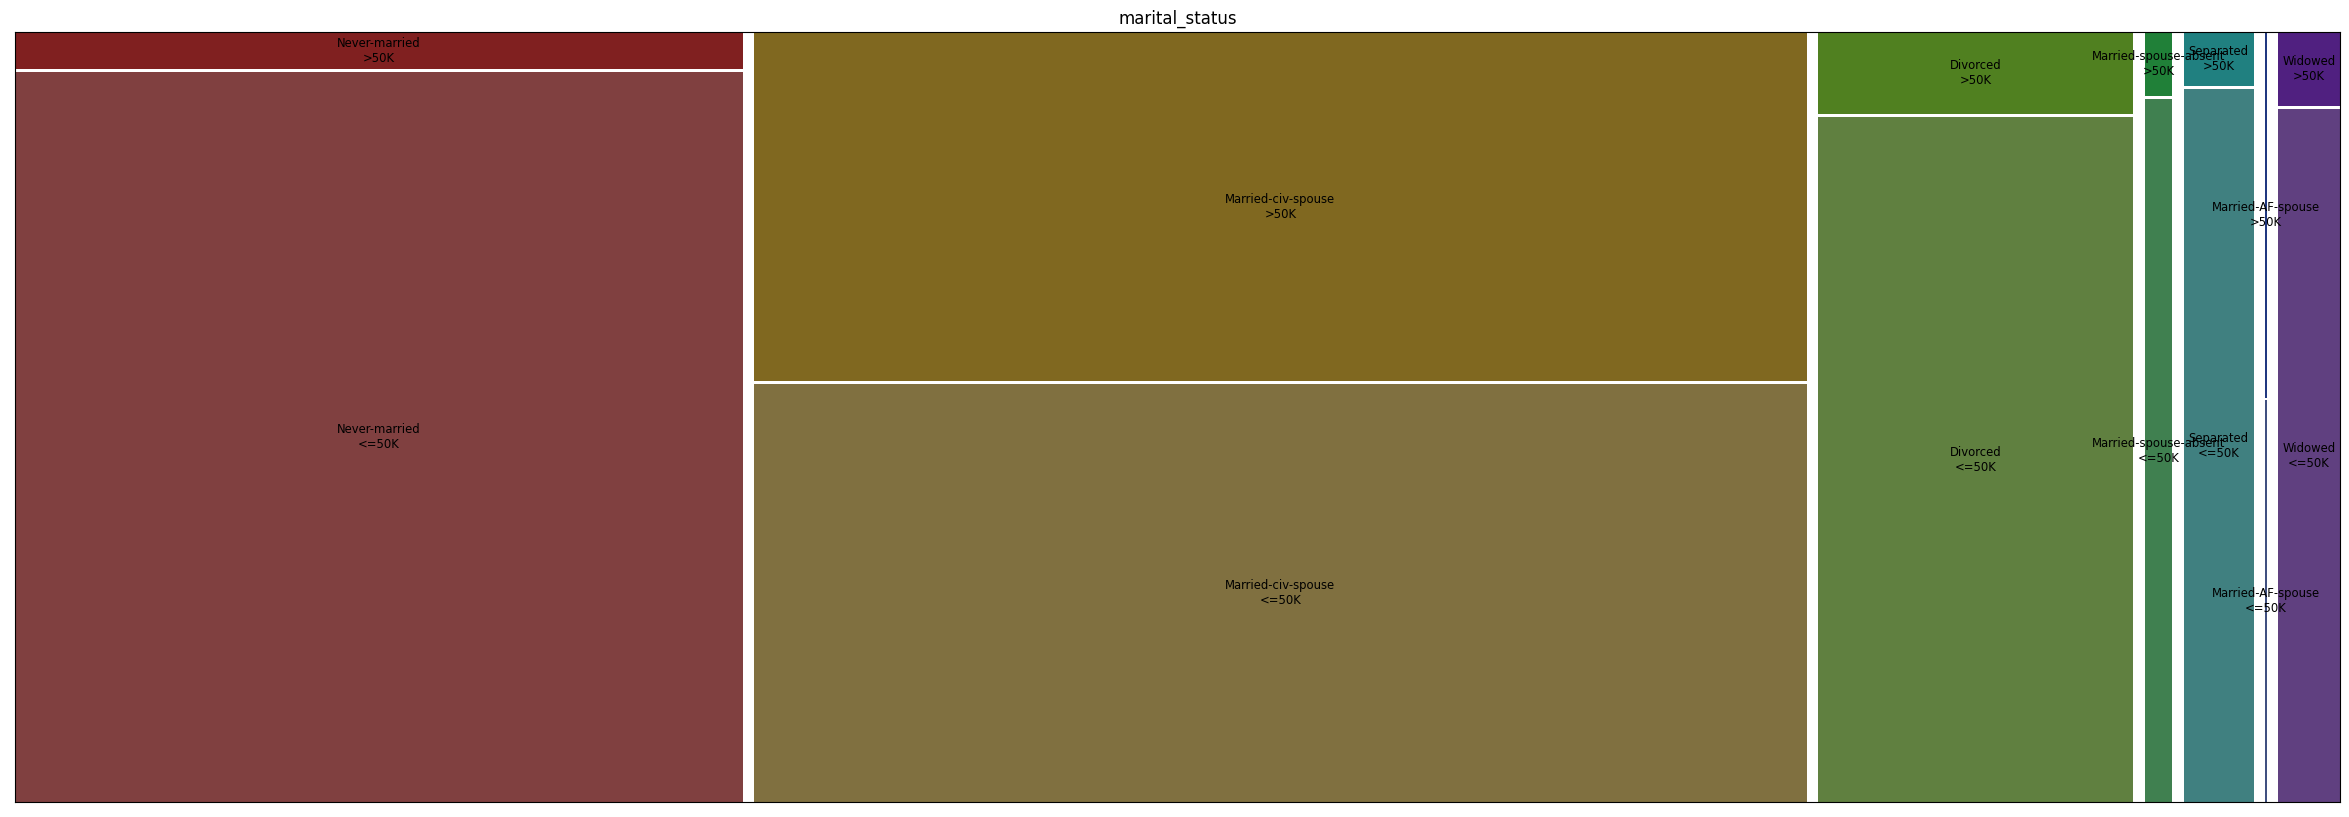

For variable sex
Male      6396
Female    1112
Name: sex, dtype: int64
Male      13984
Female     8670
Name: sex, dtype: int64


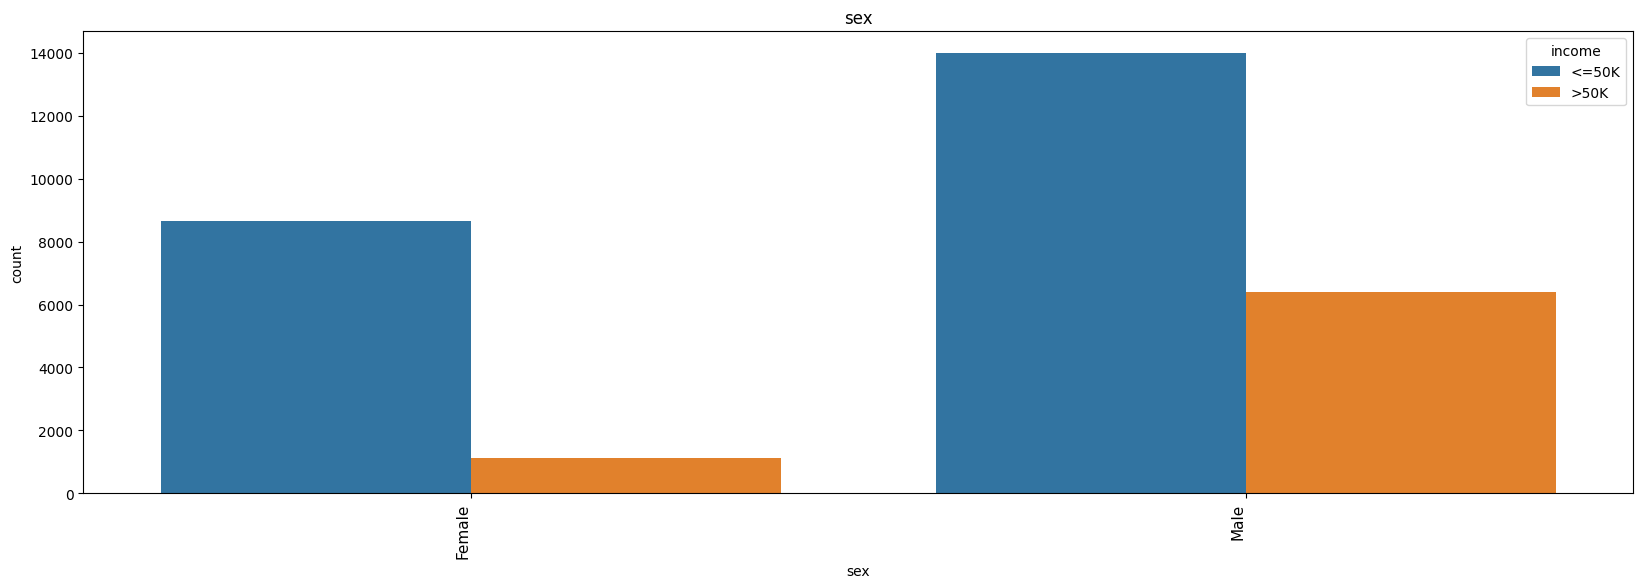

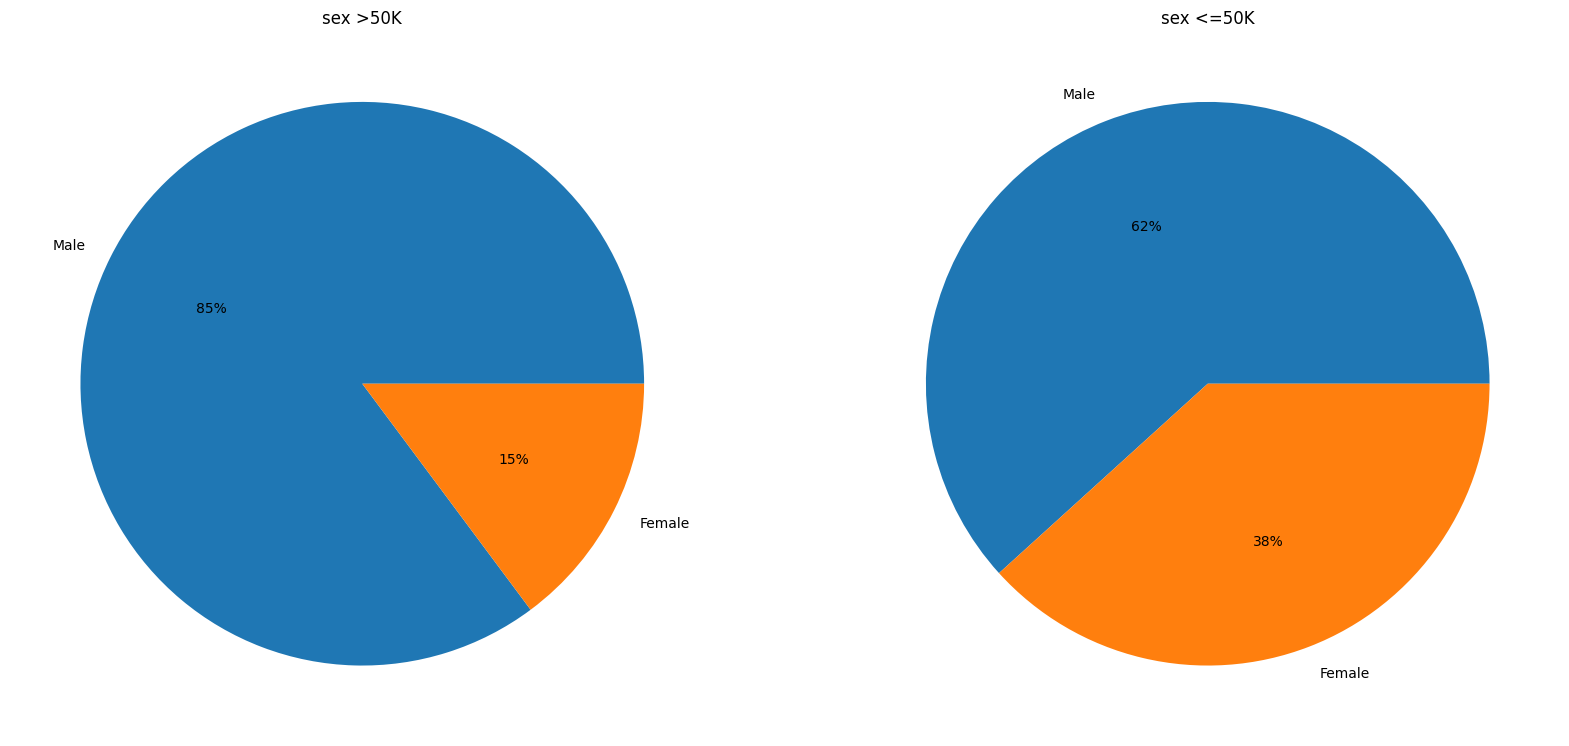

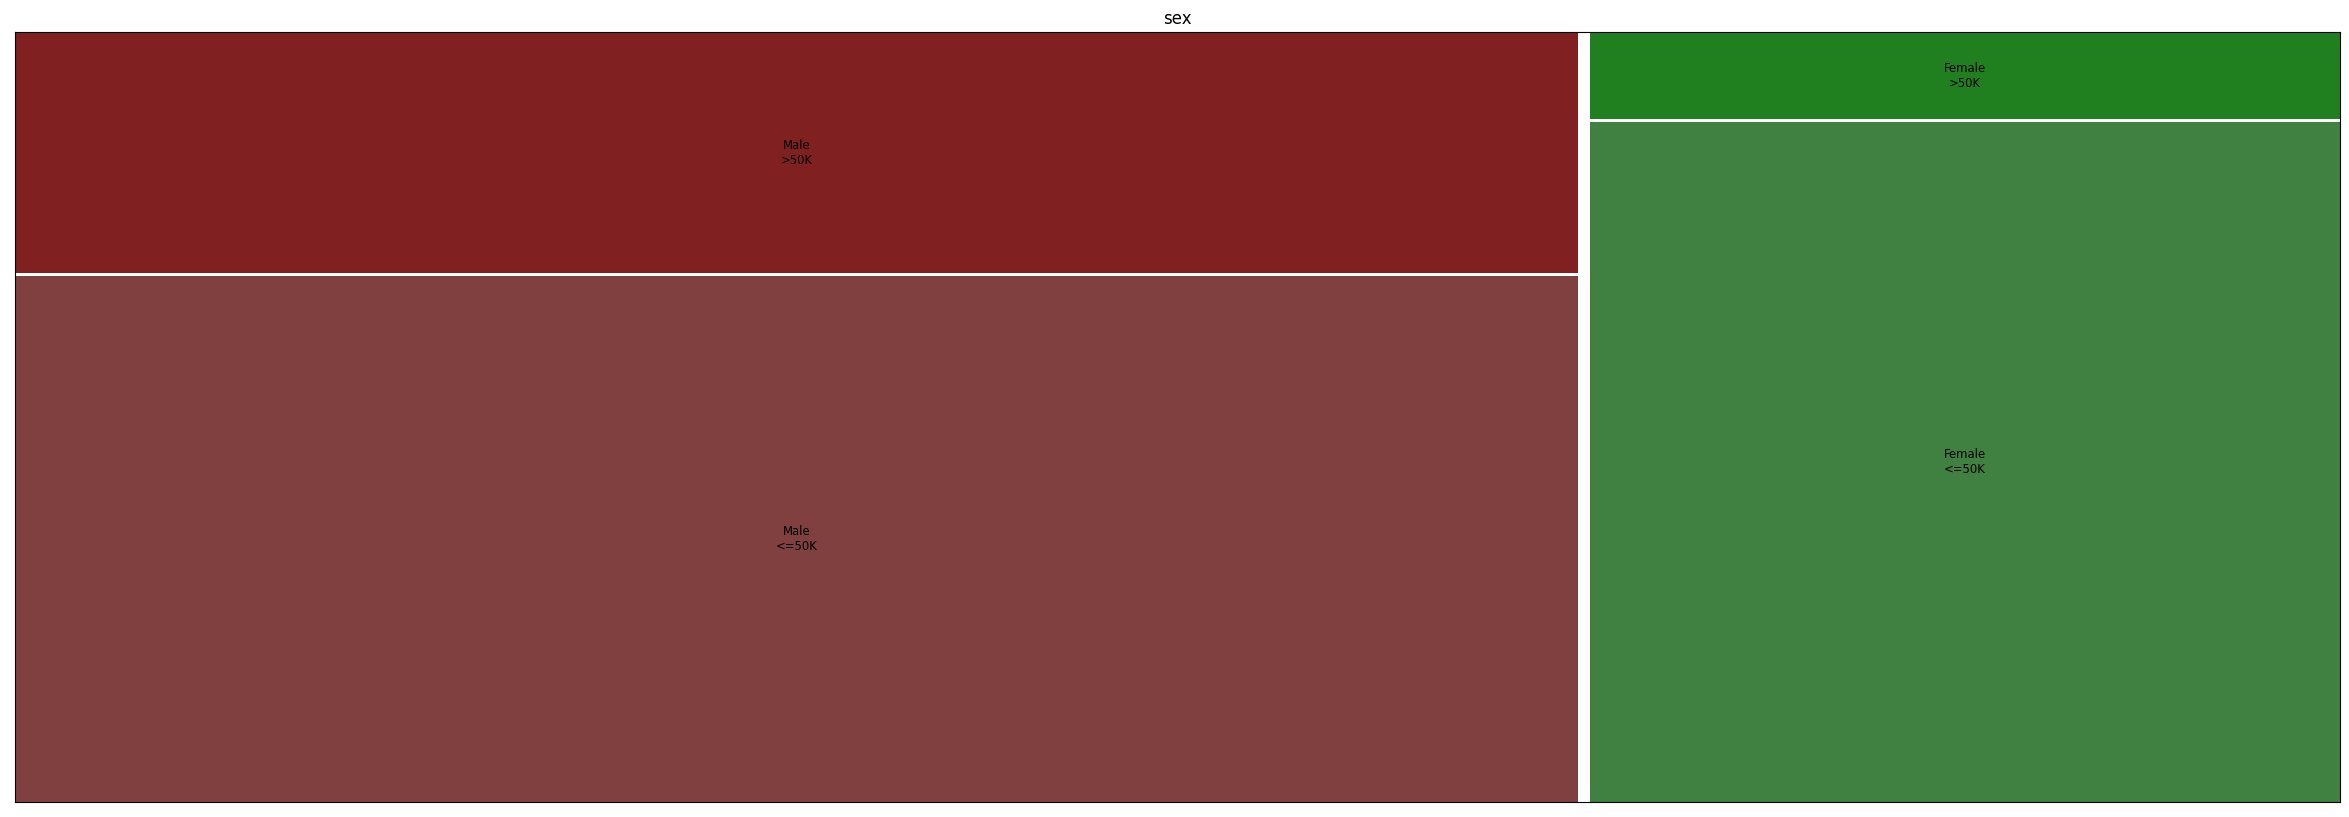

For variable occupation
Exec-managerial      1937
Prof-specialty       1811
Sales                 970
Craft-repair          908
Adm-clerical          498
Transport-moving      319
Tech-support          278
Machine-op-inspct     245
Protective-serv       210
Other-service         132
Farming-fishing       115
Handlers-cleaners      83
Armed-Forces            1
Priv-house-serv         1
Name: occupation, dtype: int64
Adm-clerical         3223
Craft-repair         3122
Other-service        3080
Sales                2614
Prof-specialty       2227
Exec-managerial      2055
Machine-op-inspct    1721
Handlers-cleaners    1267
Transport-moving     1253
Farming-fishing       874
Tech-support          634
Protective-serv       434
Priv-house-serv       142
Armed-Forces            8
Name: occupation, dtype: int64


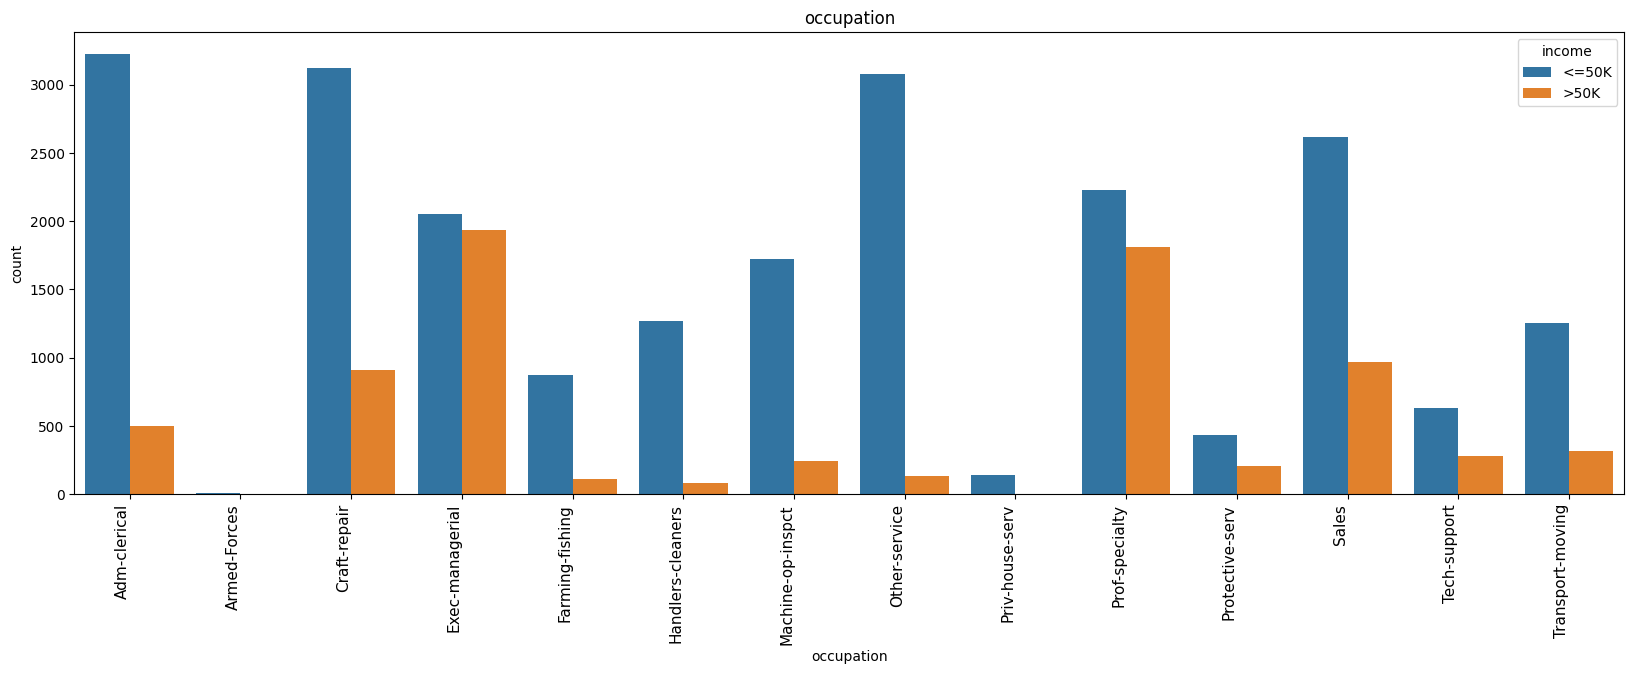

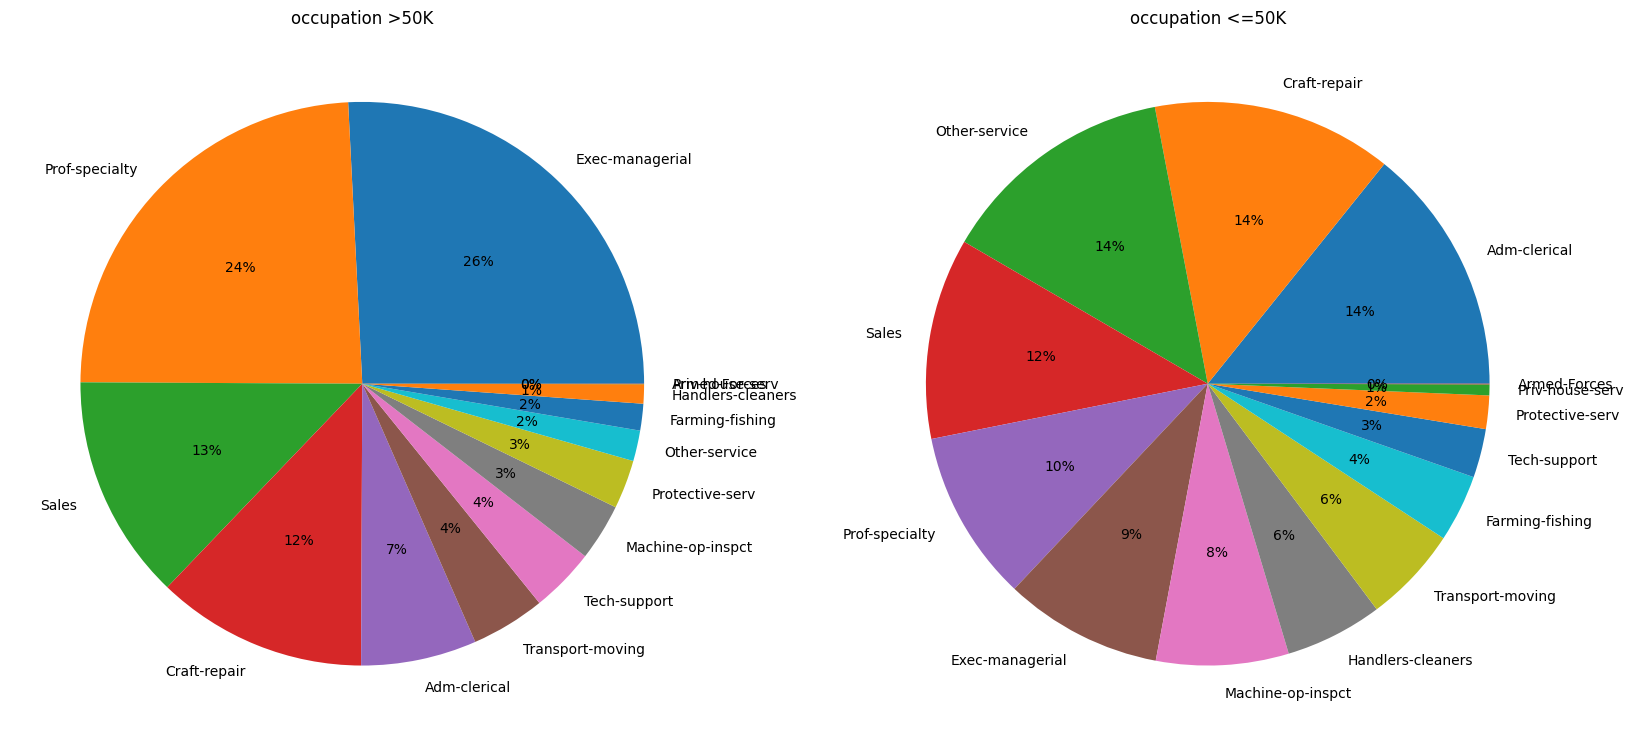

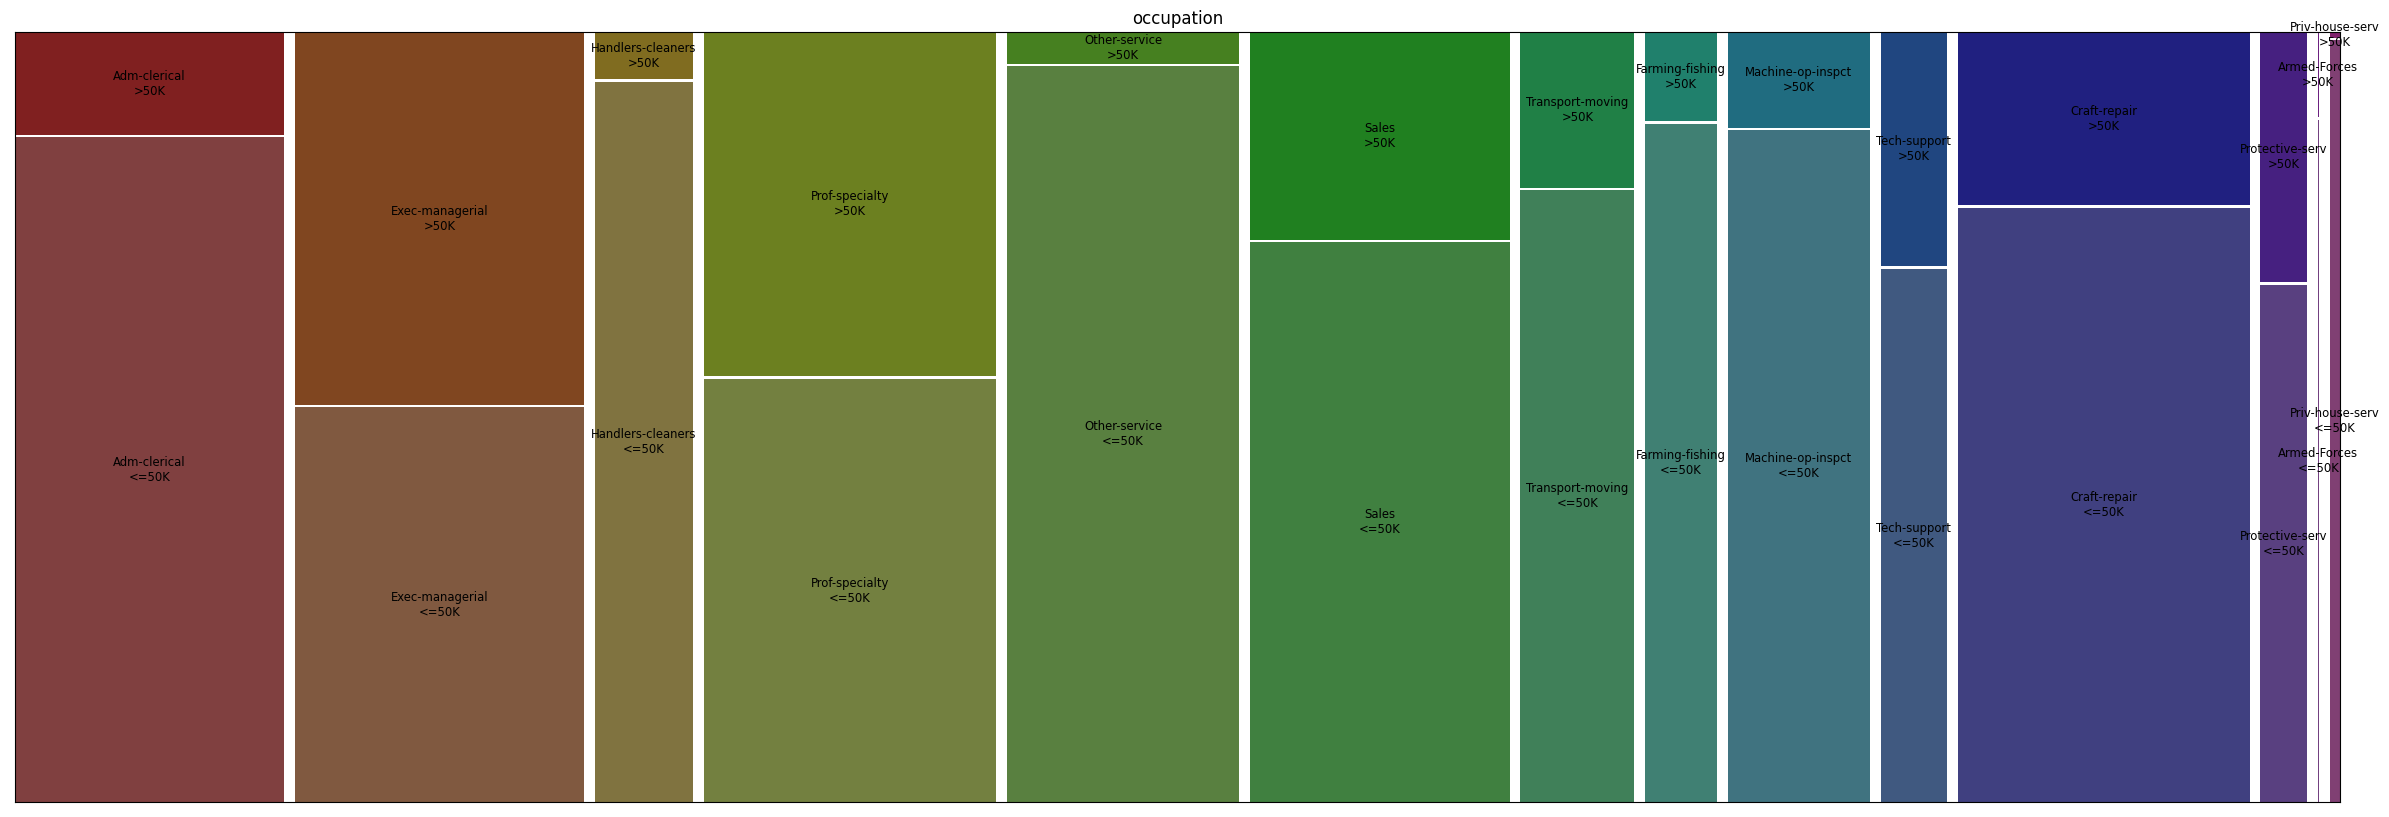

For variable relationship
Husband           5679
Not-in-family      823
Wife               694
Unmarried          213
Own-child           64
Other-relative      35
Name: relationship, dtype: int64
Not-in-family     6903
Husband           6784
Own-child         4402
Unmarried         2999
Other-relative     854
Wife               712
Name: relationship, dtype: int64


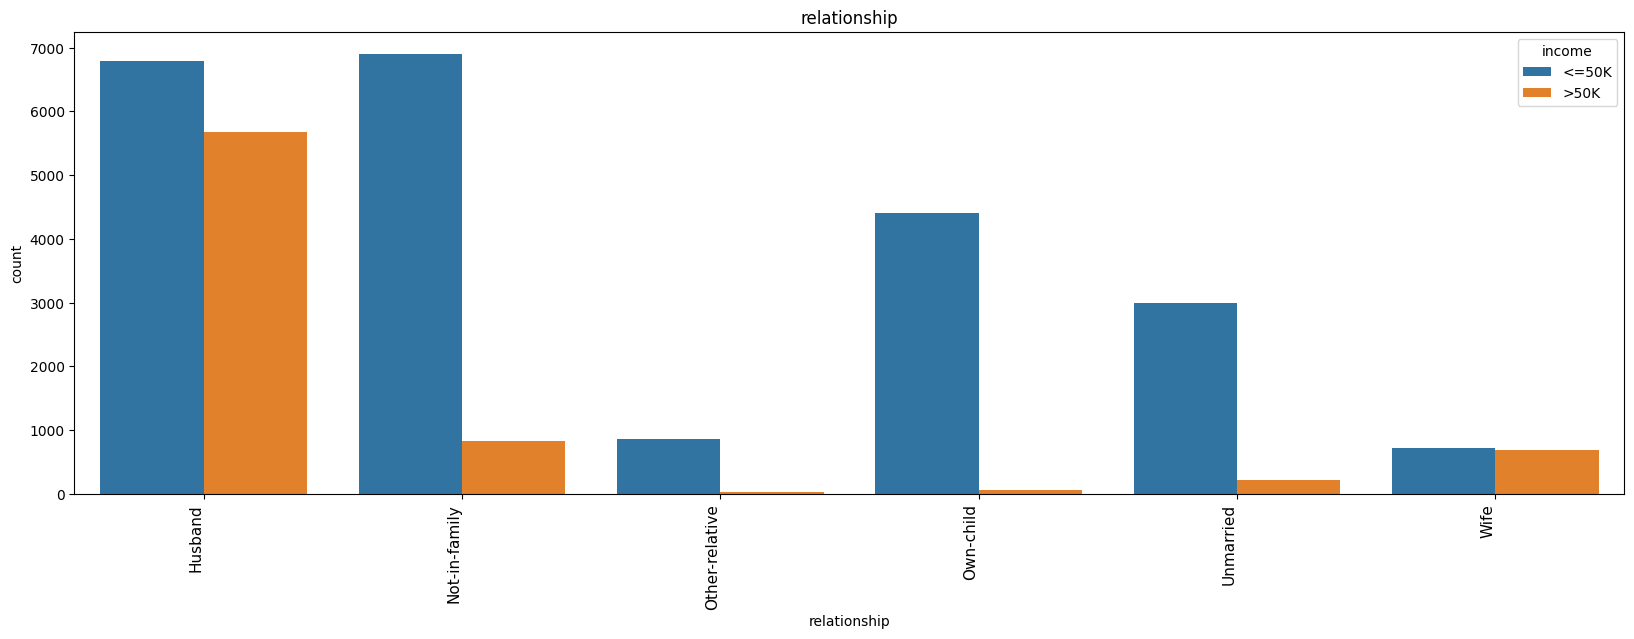

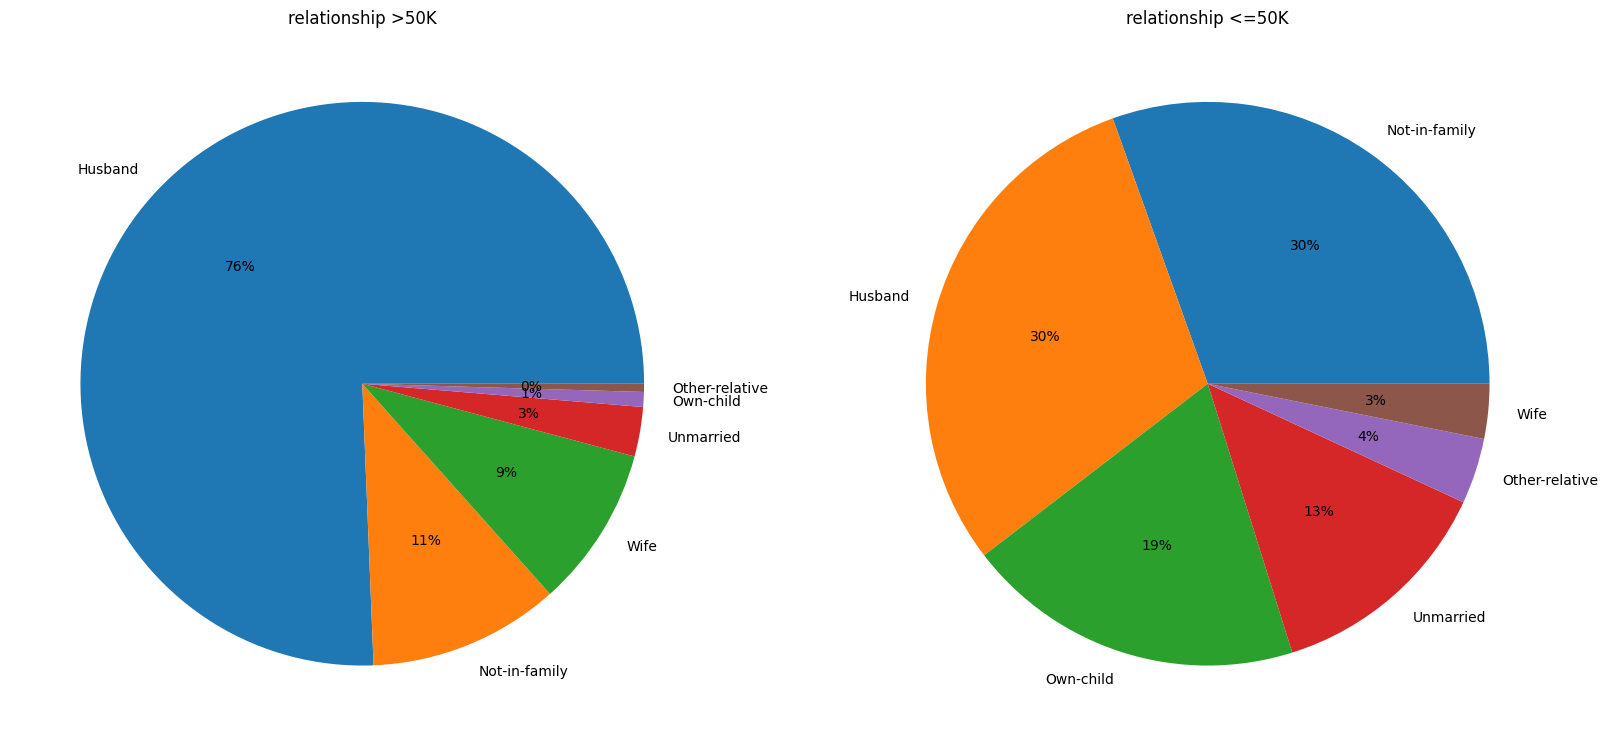

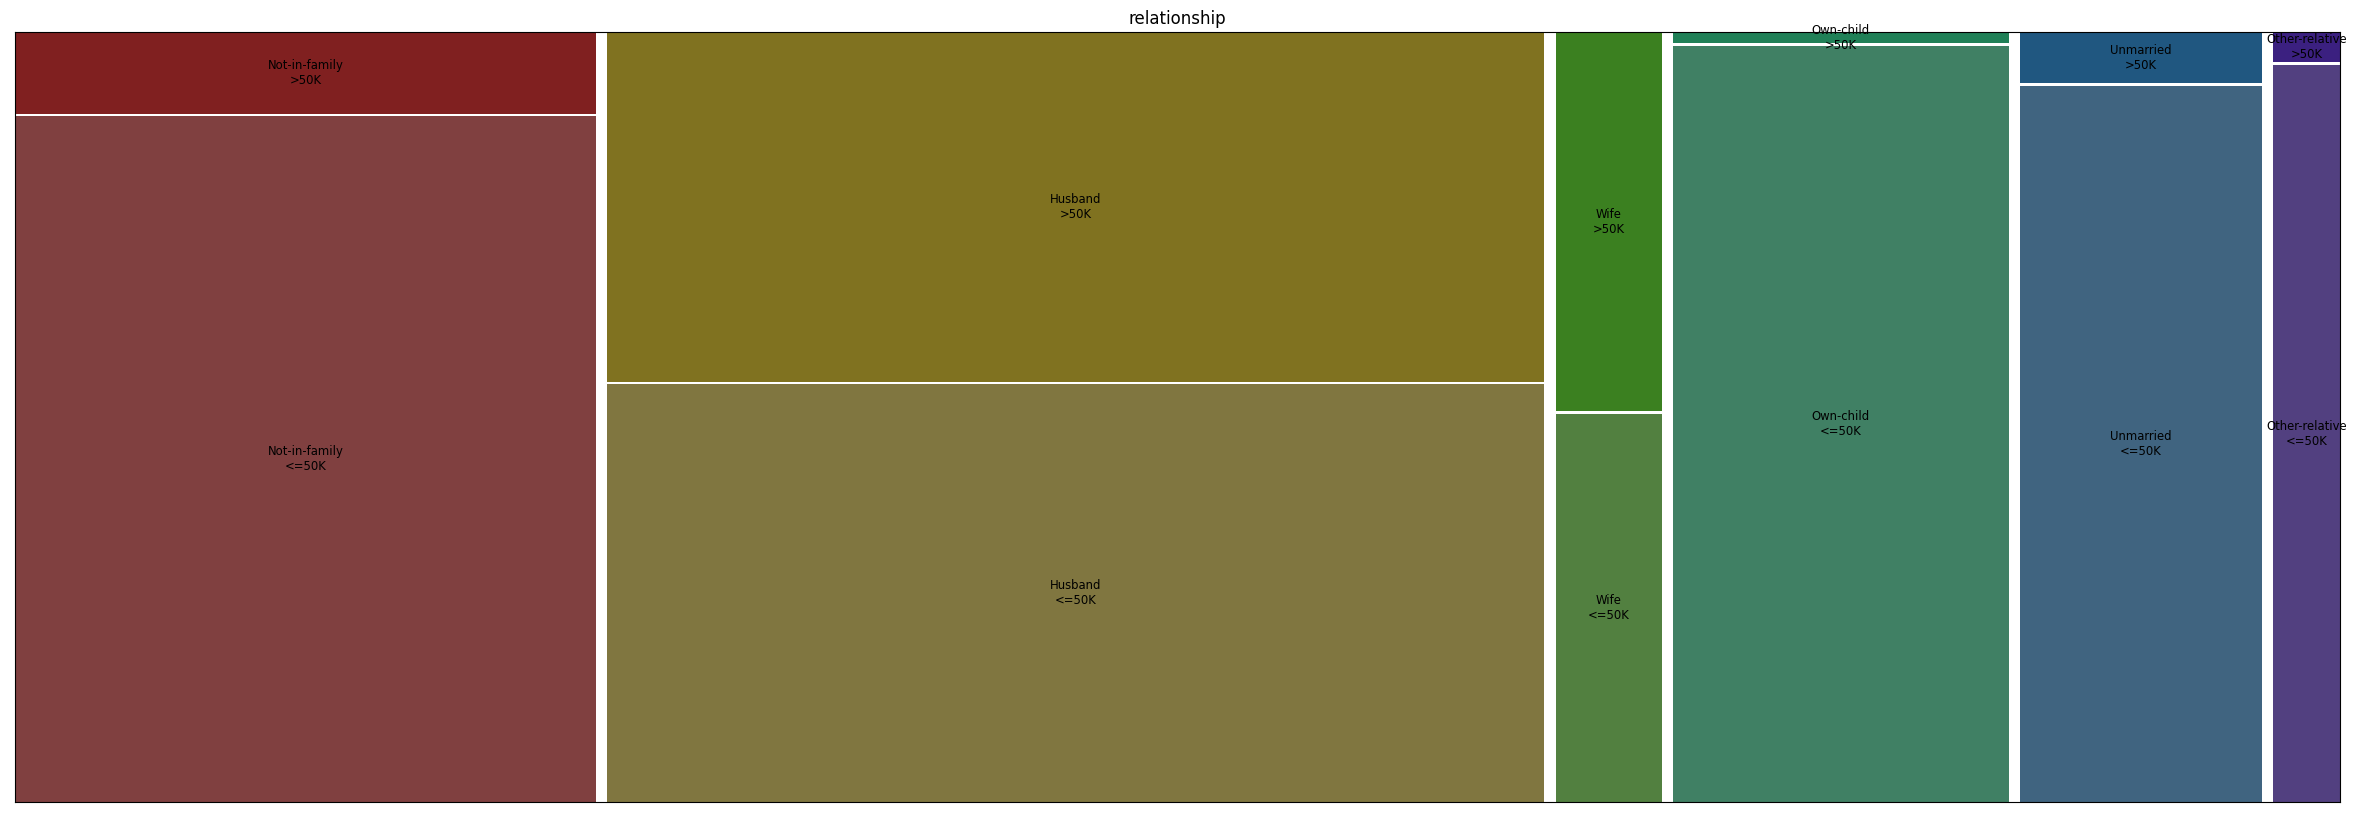

In [88]:
categorical('marital_status')
categorical('sex')
categorical('occupation')
categorical('relationship')

For variable age
Min is: 17
Max is: 90
Mean is: 38.437901995888865
Std Dev is: 13.134664776855985


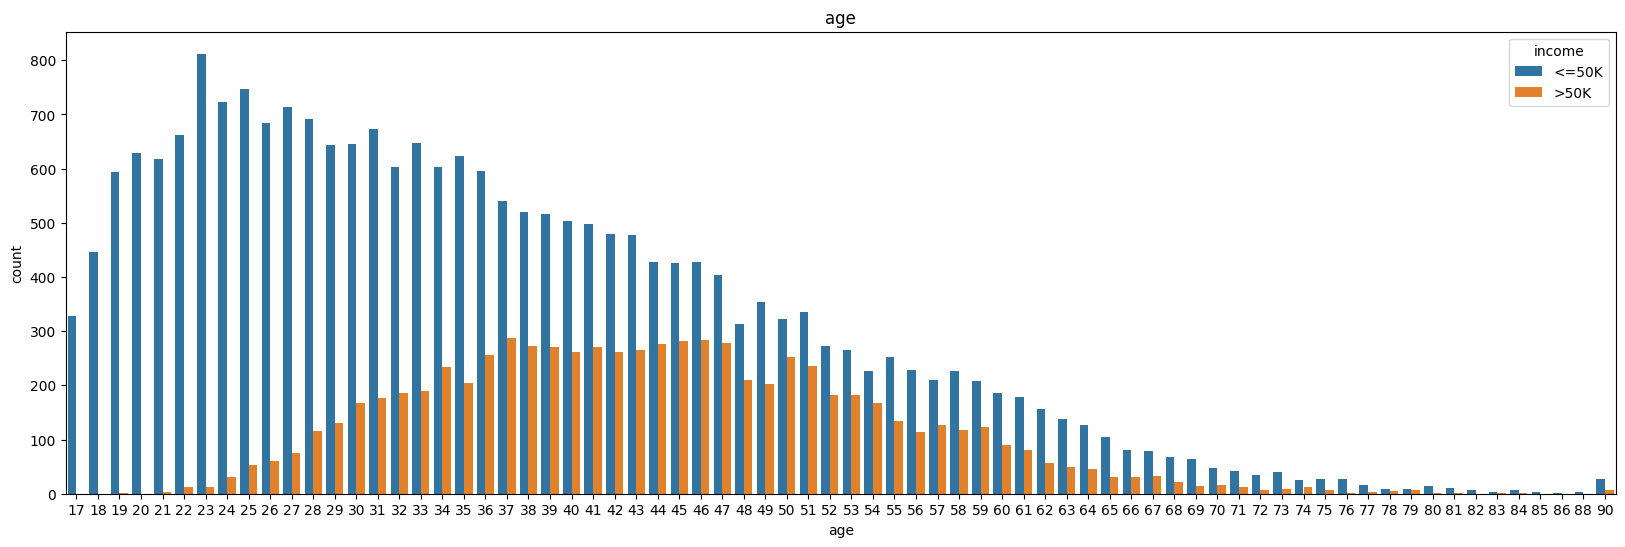

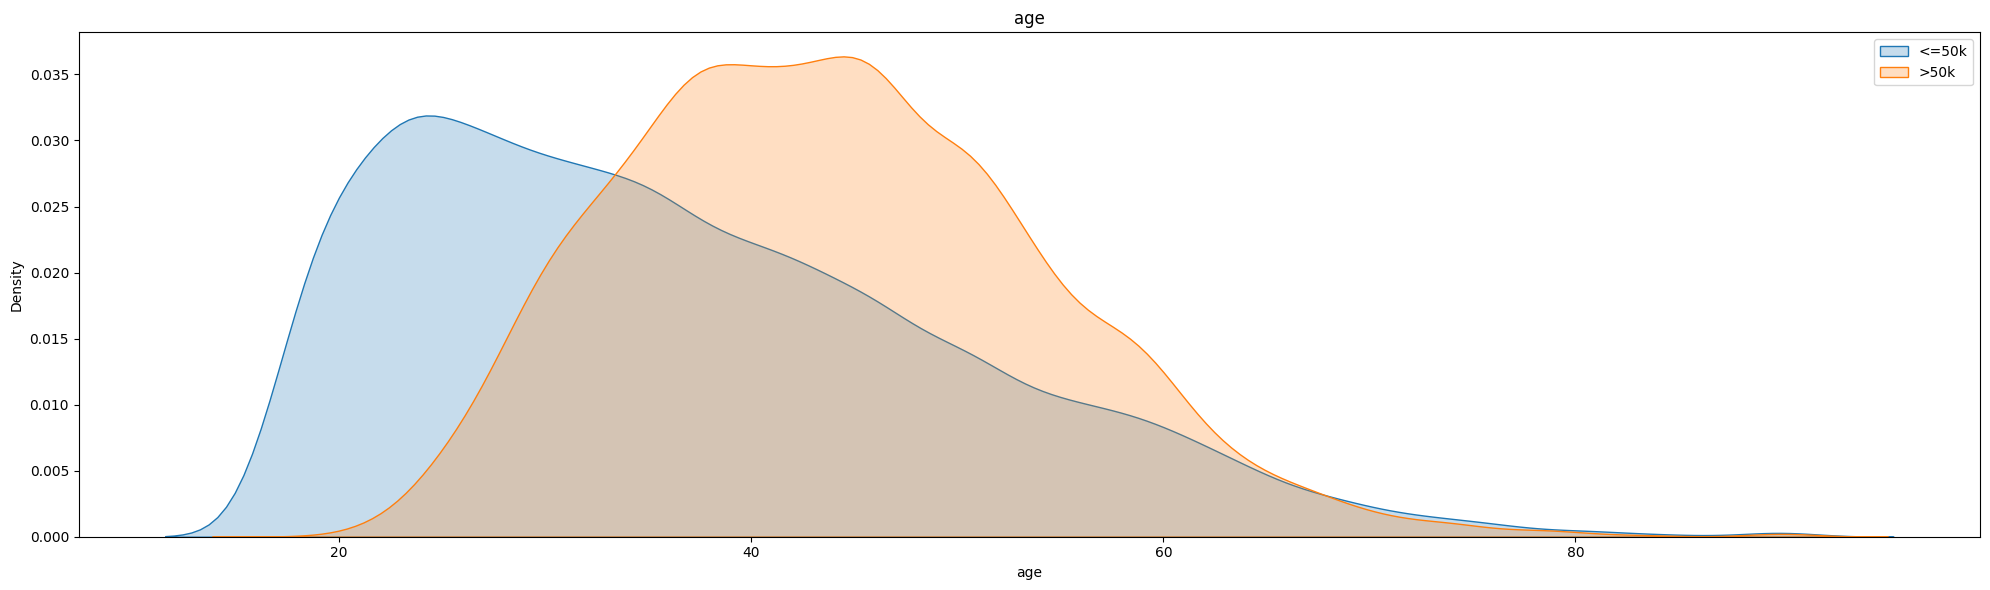

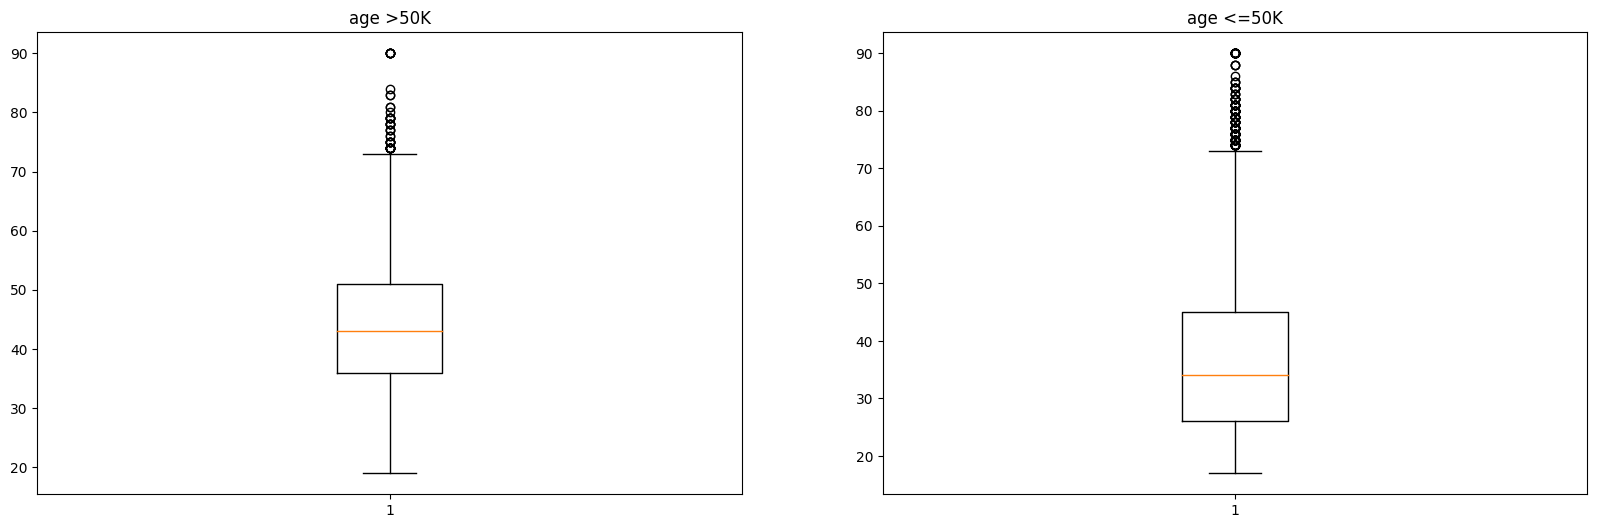

For variable education_num
Min is: 1
Max is: 16
Mean is: 10.12131158411246
Std Dev is: 2.549994918856736


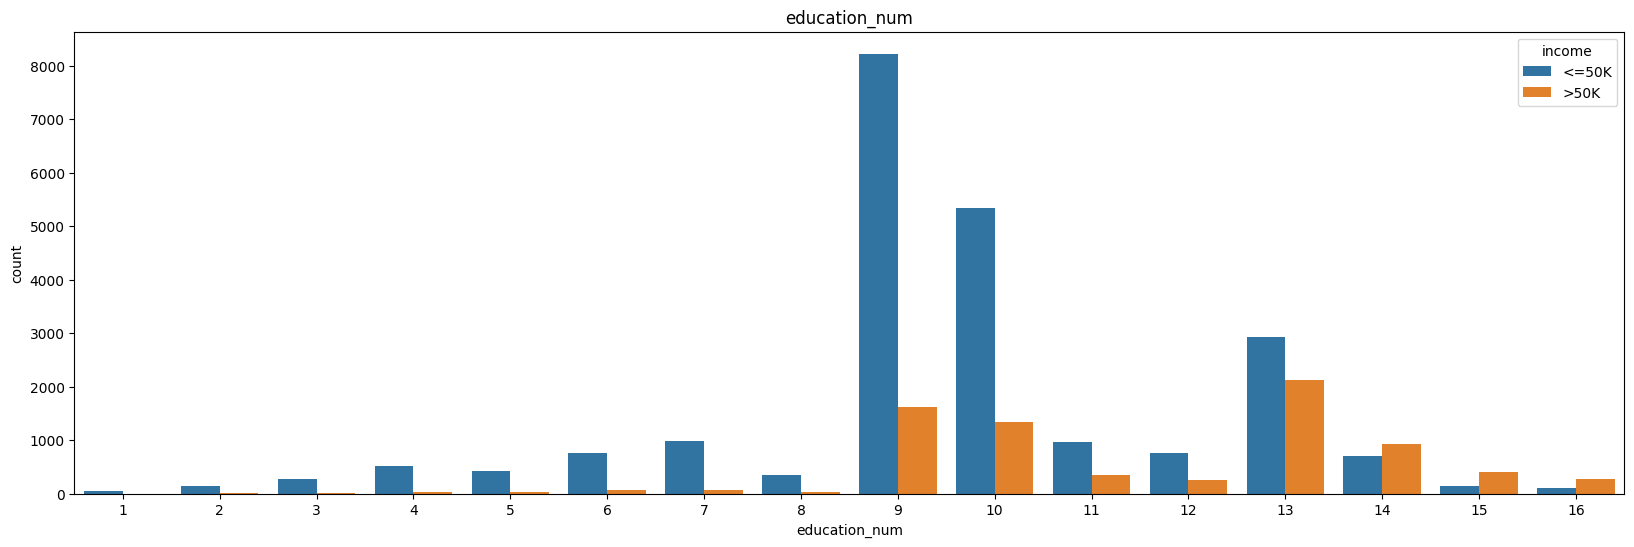

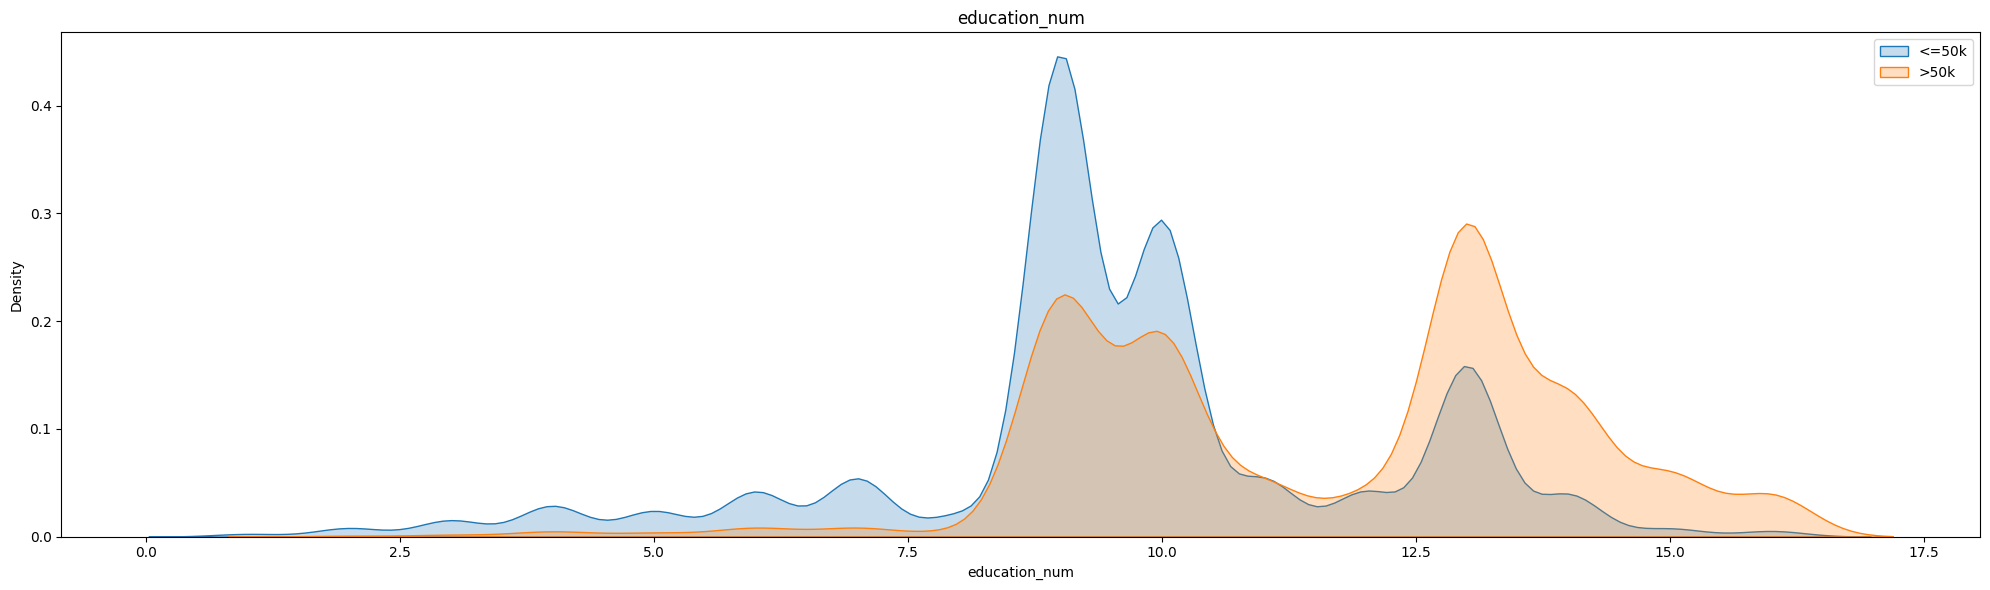

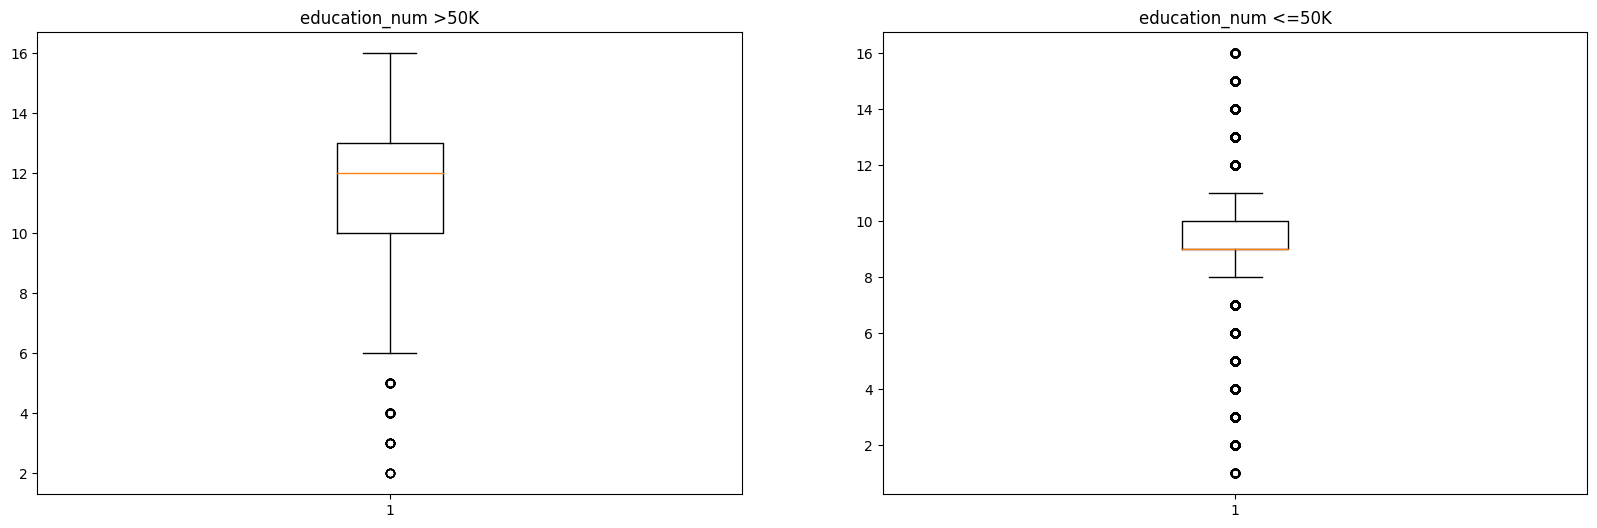

For variable capital_gain
Min is: 0
Max is: 99999
Mean is: 1092.0078575691268
Std Dev is: 7406.346496683503


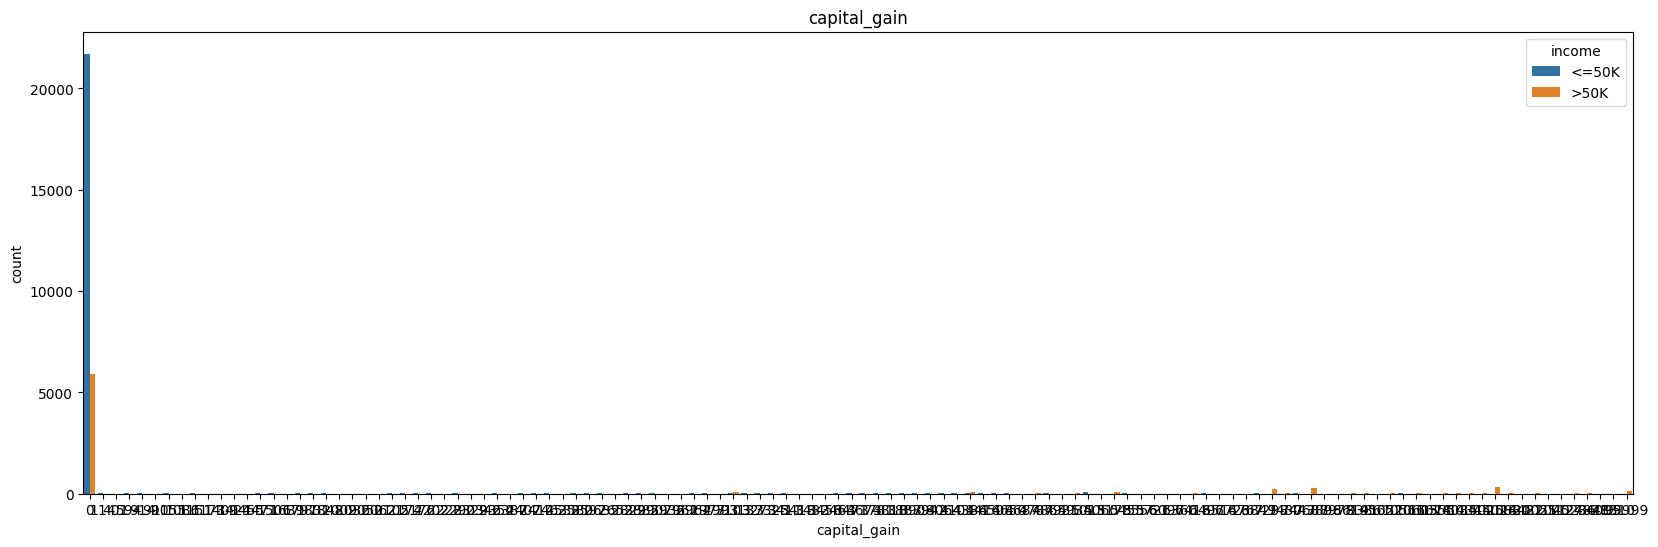

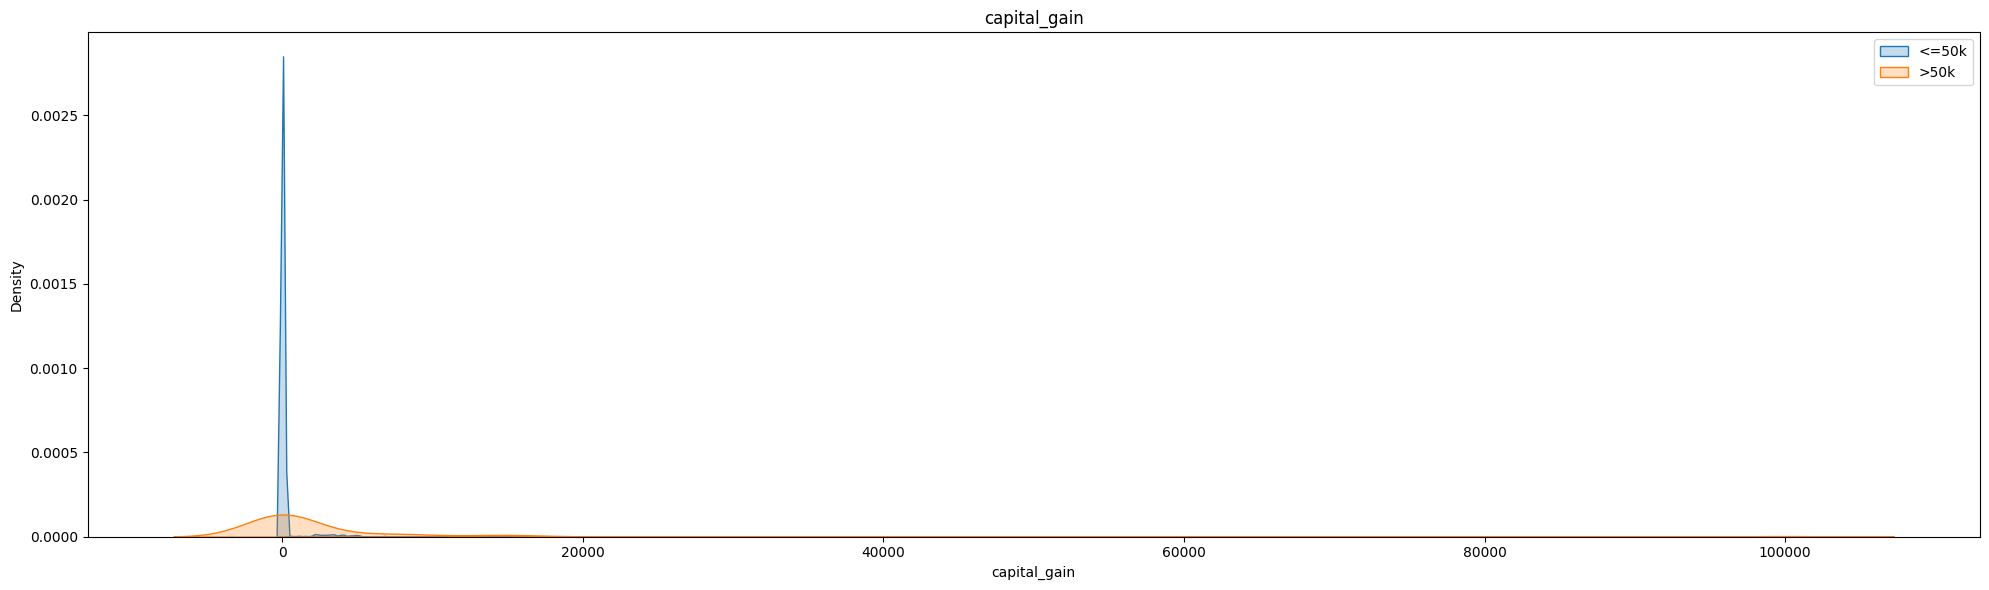

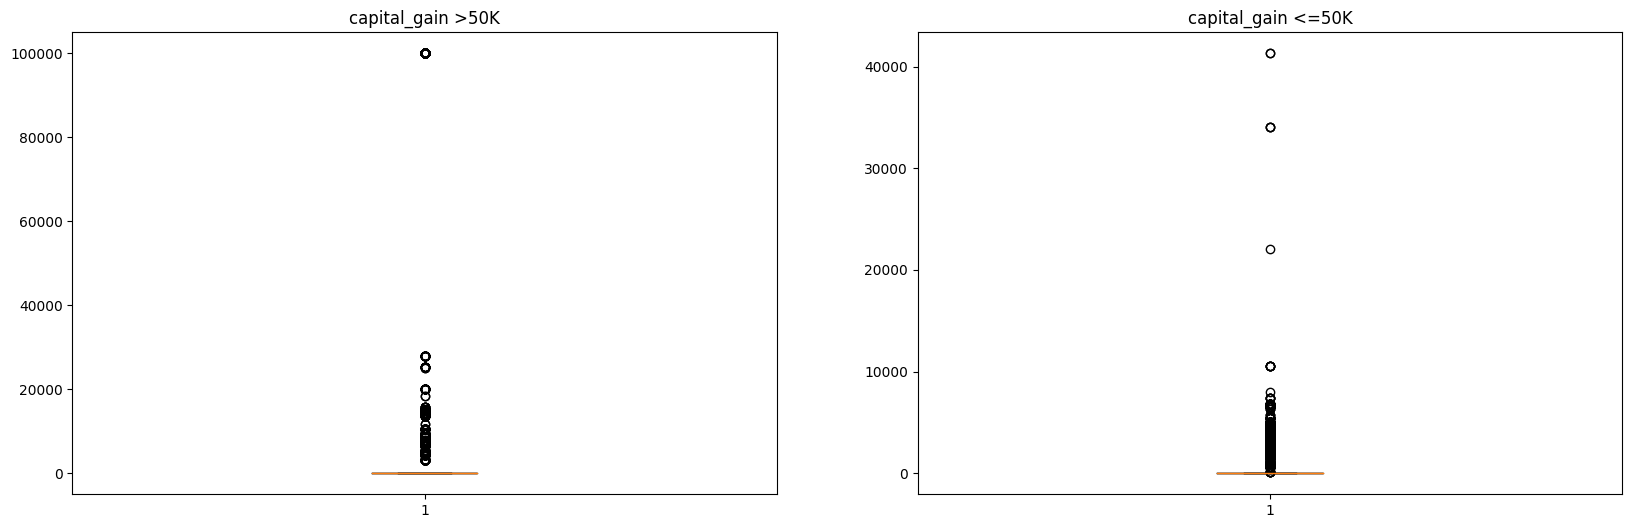

For variable capital_loss
Min is: 0
Max is: 4356
Mean is: 88.37248856176646
Std Dev is: 404.29837048637575


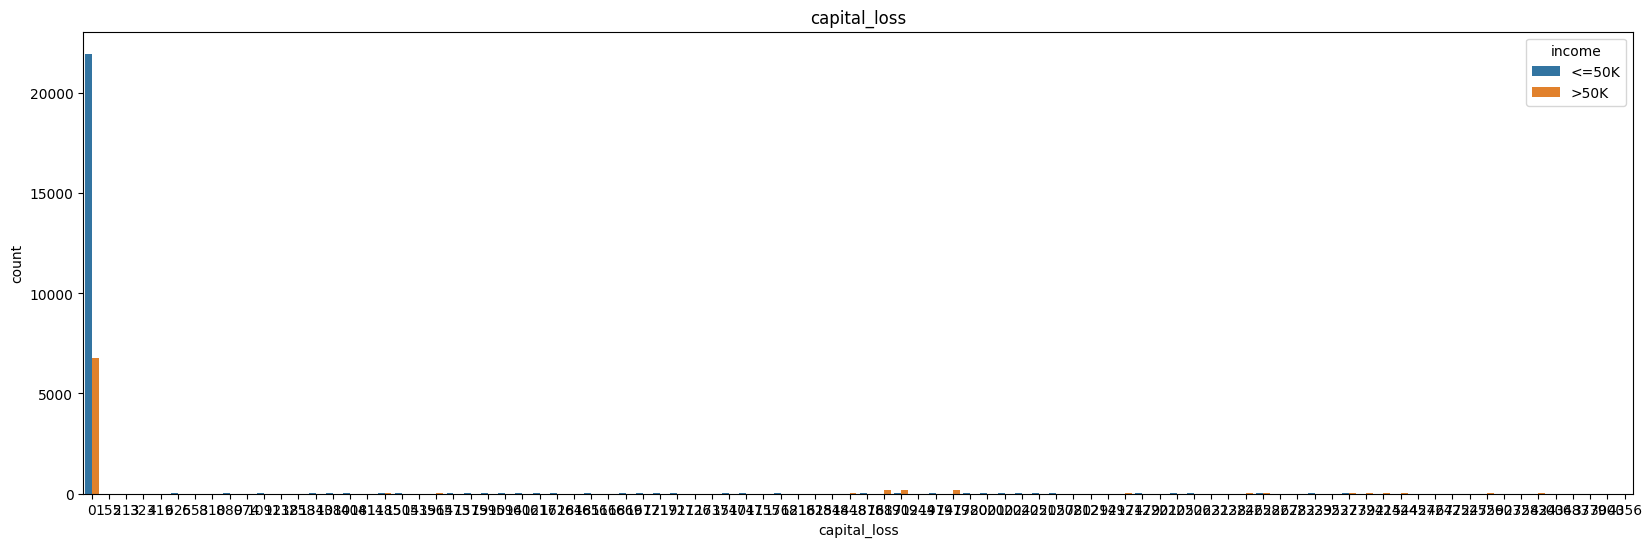

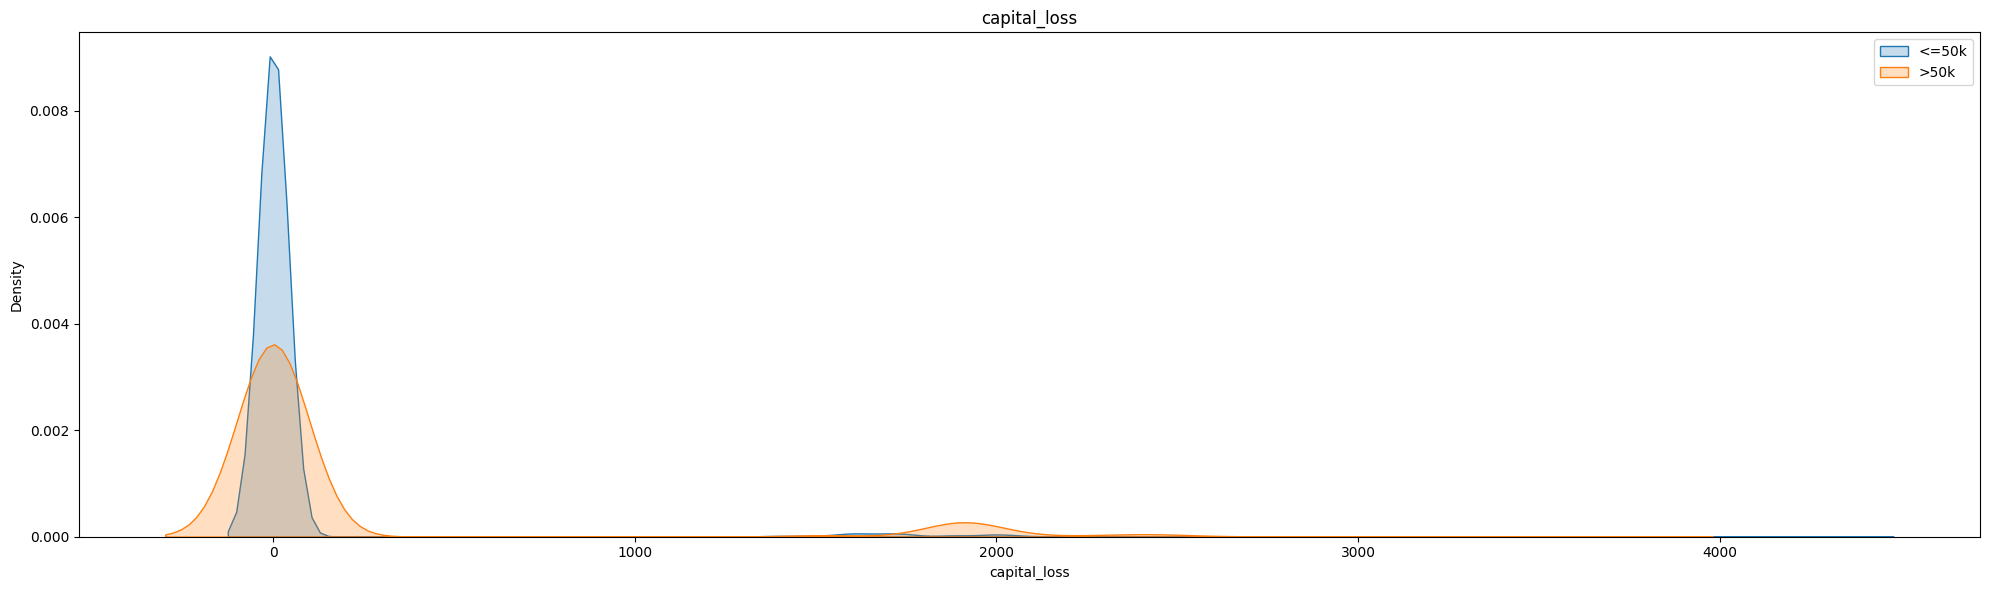

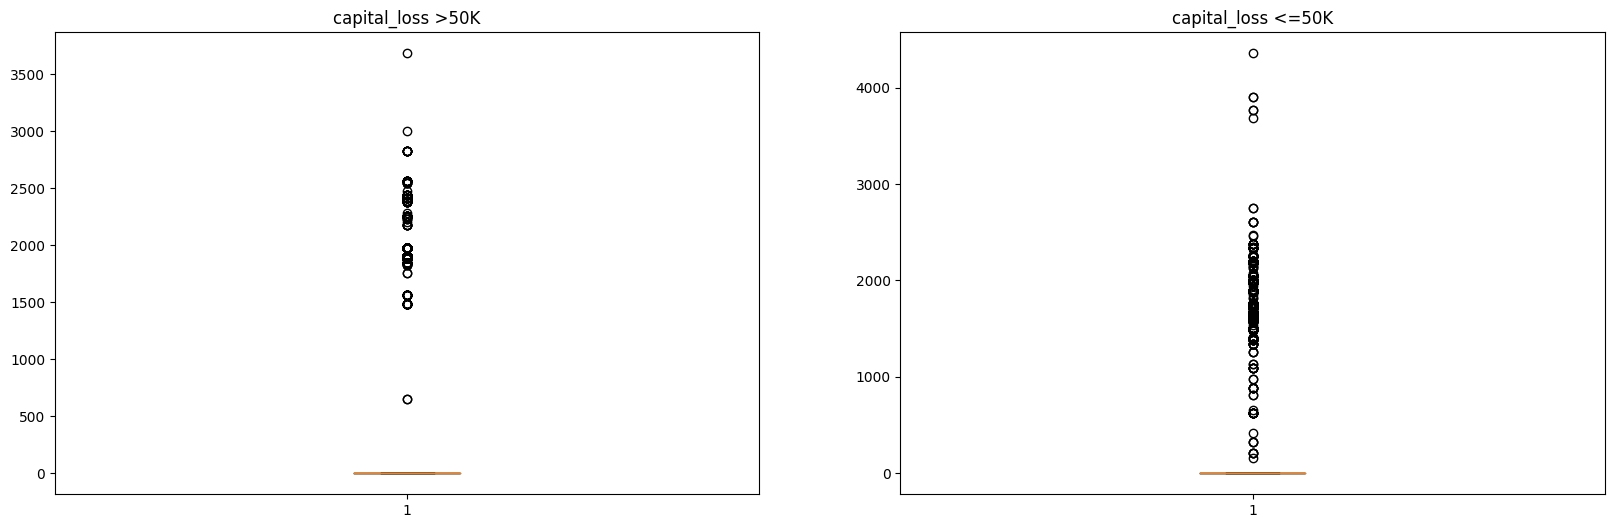

In [89]:
numerical('age')
numerical('education_num')
numerical('capital_gain')
numerical('capital_loss')

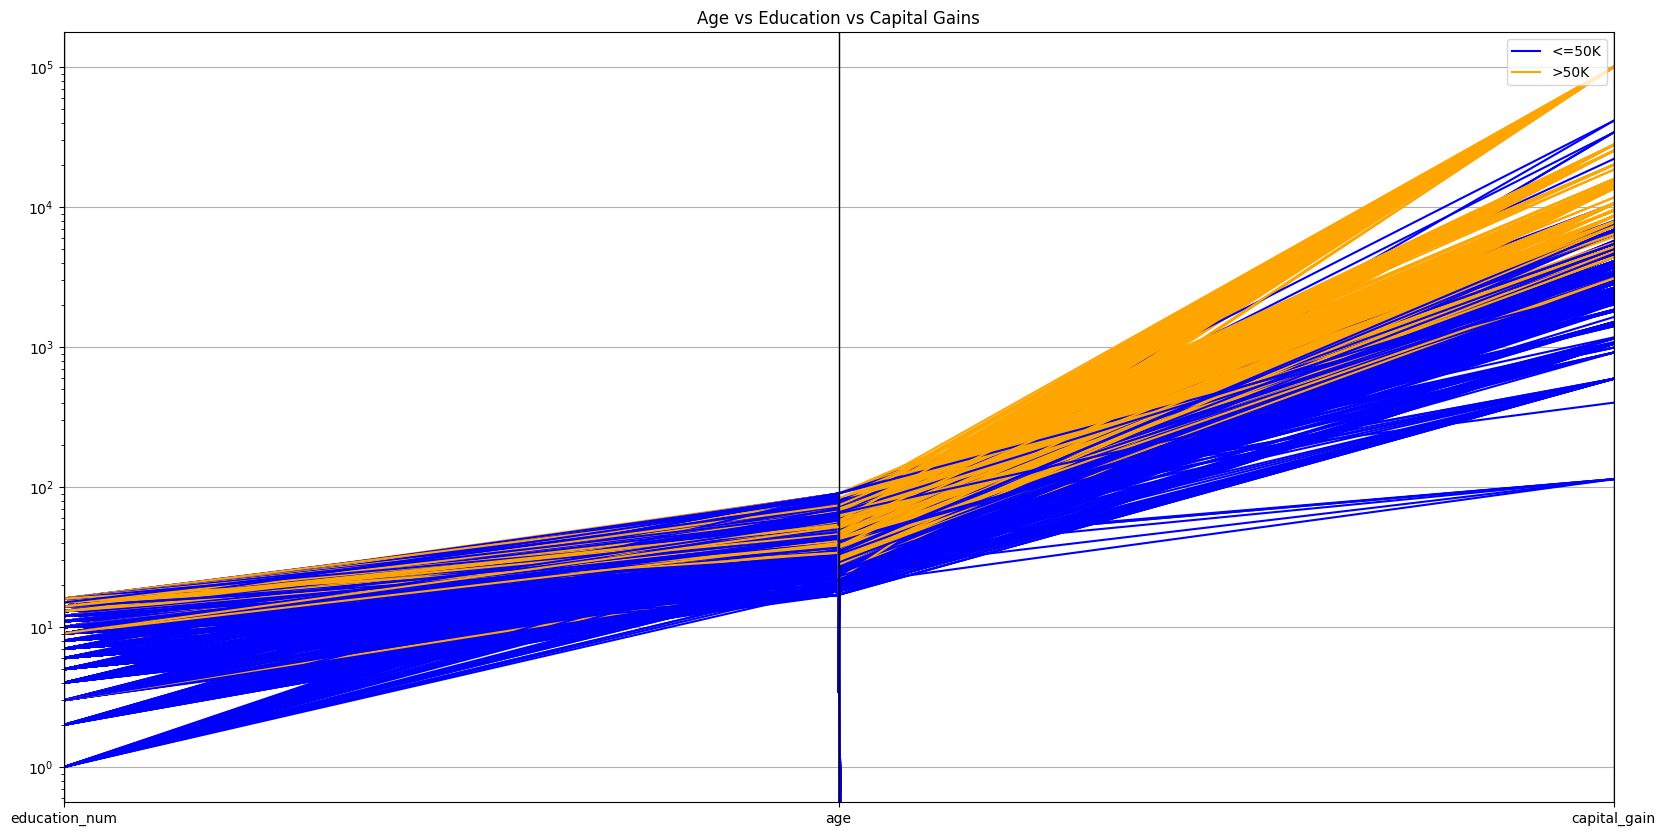

In [90]:
# multivariate analysis
fig, ax = plt.subplots(figsize=(20,10))
parallel_coordinates(data[[ 'education_num', 'age','capital_gain', 'income']], 'income', color=['blue', 'orange'])
plt.yscale('log')
plt.title('Age vs Education vs Capital Gains')
plt.show()


<Figure size 2000x1000 with 0 Axes>

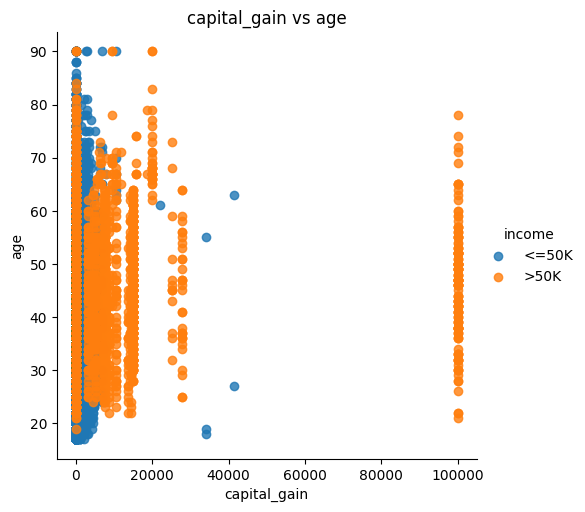

<Figure size 2000x1000 with 0 Axes>

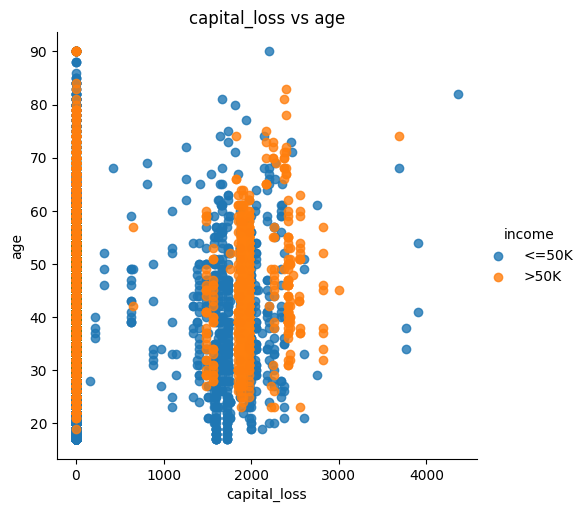

In [91]:
# multivariate analysis
def compare(col1, col2):
    # scatterplot of two variables by income
    fig1 = plt.figure(figsize=(20, 10))
    ax1 = sns.lmplot(x=col1, y=col2, data=data, fit_reg=False, hue='income', legend=True)
    plt.title(col1 +' vs '+ col2)
    plt.show()

compare('capital_gain', 'age')
compare('capital_loss', 'age')